# Introduction to Machine Learning
---
Written by Liam Thorne for SWiCS & WiE Python Data-Analysis Sessions (2023)

In [105]:
!pip install numpy matplotlib scikit-learn

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

## Overview

Machine learning is the use of numerical models to analyse data, identify patterns and predict new data based on these learned patterns. In this way, machine learning models simulate functions of the real world.

Machine learning models vary greatly in the way they work, the data they use and the way that they learn but the fundamental requirements for training any machine learning model are:

1. A model with parameters to update
2. An objective function
3. Training samples

The model is a mathematical structure for which parameters are updated to fit the training data. An objective function indicates the error between the value the model predicted and the correct value. Training samples define the problem being trained on and are used to update the model parameters.

Although there are many variations of model class; too many to cover in this notebook. The two common archetypes which most models fit into are regression and classification. Regression tries to predict a continuous value (e.g. linear regression) but classification selects a value from a predefined class e.g. does the picture contain a cat or a dog?

## Neural Networks

The majority of models today are deep neural networks. Neural networks are collections of simple mathematical operators (neurons), in layers, which learn to capture complex relationships in the training data. A neuron is simply an addition of some values and their corersponding weights and a bias value. The weights $w_i$ are the gradient of the function and the bias $b$ is the intercept.

$$
\sum_{i}x_iw_i + b
$$

This output is then passed to an activation function which indicates whether the neuron is active or not. There are many activation functions but `sigmoid` is the building block of potentially the simplest neural network - logistic regression. Confusingly logistic regression is a `binary classification` algorithm - given the name regression because of it's mathematical similarity to linear regression.

The rest of this notebook will walk through setting up a single layer logistic regression network for binary classification.

<img src=https://deeplearningmath.org/images/logistic_regression_neurone_new.png>

(image from [here](https://deeplearningmath.org/logistic-regression-type-neural-networks.html))

## Question 1 - Generating Training Data

To train our model, we are going to need data. We could go and find a dataset to train on or we can generate some synthetic training data. 

i) Generate 500 training samples use [sklearn.make_classification](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) with two informative features, no redundant features and 1 cluster per class.

ii) Plot the training samples on a [scatter plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html).

iii) Play with the `random_state` parameter of `make_classification` until you get two fairly separate clusters.

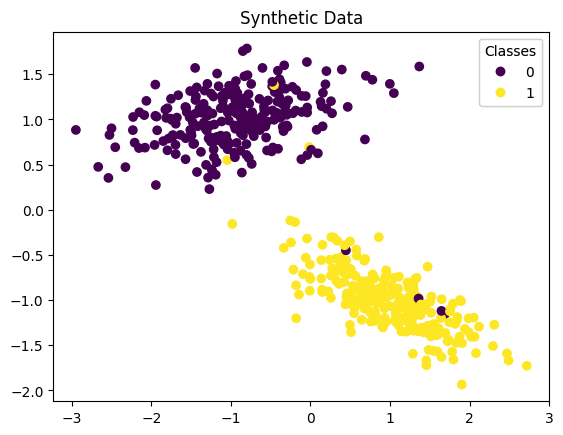

In [88]:
# Answer Here
X, y = make_classification(n_samples=500, n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1, random_state=100)

fig, ax = plt.subplots()

scatter = ax.scatter(X[:, 0], X[:, 1], marker='o', c=y)
legend = ax.legend(*scatter.legend_elements(), title="Classes")
ax.add_artist(legend)
ax.set_title("Synthetic Data")

plt.show()

## Question 2 - Design Matrix

A feature vector describes the value of each parameter for a single data point $x_i$. For example, if a person is categoriesed by age and height (cm), their feature vector may look like $x_1 = \begin{bmatrix} 46 \\ 167 \end{bmatrix}$. A design matrix is a collection of feature vectors in a single matrix. Matrices are the building block of all machine learning because of their computational efficiency. To improve this computational efficiency, we append a 1 to each of the feature vectors in the design matrix to include the bias $b$ (sometimes labelled $w_0$) summation in the matrix multiplication. This multiplication of the weights with the input is usually assigned to $z$.

$$
z = Xw =
\begin{bmatrix}
1 & x_{1, 1} & \cdots & x_{1, m} \\
\vdots & \vdots & & \vdots \\
1 & x_{1, m} & \cdots & x_{n, m}
\end{bmatrix}

\cdot

\begin{bmatrix}
b \\
w_1 \\
\vdots \\
w_m
\end{bmatrix}
$$

There are many ways to initialise your weights but setting them all to 0 or setting them all to random numbers are among the most common.

i) Turn the training samples, defined in the previous question, into a design matrix called `X`.

ii) Randomly initialise a weights vector with the same number of elements as each transformed feature vector. Call this `w`.

iii) Calculate the dot product of X and w and assign the value to `z`. The result should be a vector.

In [89]:
np.random.seed(42)

# Answer Here
X = np.hstack([np.ones((X.shape[0], 1)), X])
w = np.random.randn(X.shape[1])

z = X @ w
z = np.dot(X, w) # equivalent to above for 2D arrays but different in 3D+
z.shape

(500,)

## Question 3 - Sigmoid

After the value at a neuron $z$ has been calculated, an activation function is used to determine whether the the neuron is active. In logistic regression, sigmoid $\sigma(z)$ is the activation function. Sigmoid normalises the output of the preceding neuron to be between 0 and 1, converting it into a probability. During inference, we consider any values larger than 0.5 to be active, and lower than 0.5 inactive. i.e.

$$
\text{decision}(z) =
\begin{cases}
1 & P(y=1|z) > 0.5 \\
0 & \text{otherwise}
\end{cases}
$$

i) Define a function named `sigmoid` with one parameter `z`, impelmenting the following mathematical function.

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

ii) Plot the function using matplotlib. 

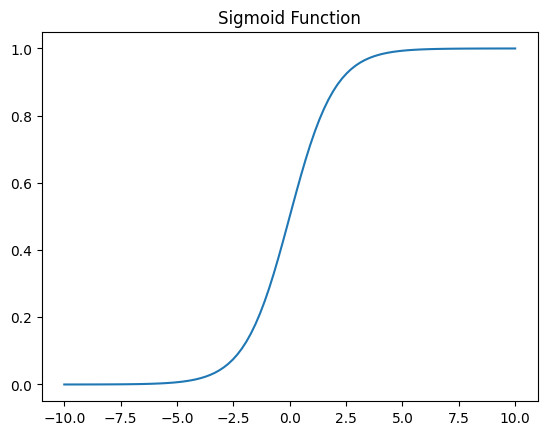

In [90]:
# Answer Here
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

x = np.linspace(-10, 10, 100)
plt.plot(x, sigmoid(x))
plt.title('Sigmoid Function')
plt.show()

## Question 4 - Forward Pass

The training of a neural network is split into two parts: forward pass and backpropagation. The forward pass takes the inputs and produces its predictions. This is what is happening during inference time when the model is being used. To update the model, the error between the predicted values and the actual values is calculated and then propagated back through the parameters $\theta$ of the model i.e. weights $w$ and biases $b$.

In the forward pass, the input is multiplied with the weight vector of the first layer. This is then fed to the first layer's activation function. If there is another layer, this output is fed to the next layer's weights and then the next layer's activation function etc. It will be important to remember this idea of a chain of functions when it comes to back propagation i.e.

$$
z_1 = Xw_{input} \implies h_1 = \sigma(z_1) \implies z_2 = h_1w_{hidden 1} \implies \cdots \implies output = \sigma(z_n)
$$
$$
output = \sigma(\sigma(\cdots (\sigma(Xw_{input})w_{hidden1}))w_{out})
$$

In our case, we only have one layer so the final output is the actvation function of layer 1.

i) Define a function called `forward` which accepts parameters `X` and `w`. In this function, multiply the design matrix by the weights, apply the activation function and return the output

In [91]:
# Answer Here
def forward(X, w):
    z = X @ w
    y_hat = sigmoid(z)
    return y_hat

y_hat = forward(X, w)
print(y_hat.shape)

(500,)


## Question 2 - Logistic Loss

To propagate the error back through the network, we first need to find the error. The objective function we used for linear regression was mean square error (MSE). We can use MSE for linear regression because the error function produced by the model forms a convex curve, meaning a single minimum exists (singly point where $\frac{dy}{dx} = 0$). For logistic regression, the error function can produce many minima (local minimum) so optimising the function isn't guarenteed to find the global minimum.


<img src=https://editor.analyticsvidhya.com/uploads/46591Capture5.PNG height=300/>
<img src=https://editor.analyticsvidhya.com/uploads/13012download.jpg height=300 />

(Images from [here](https://www.analyticsvidhya.com/blog/2020/11/binary-cross-entropy-aka-log-loss-the-cost-function-used-in-logistic-regression/))

Instead, the objective function used by logistic regression is logistic loss, also known as `binary cross entropy loss`. This is a prediction of how close the predicted probability is to the actual value (0 or 1). The loss is higher when the predicted probability is further away from the actual value.

Logistic regression works on the idea of log odds (logit).

$$
log(\frac{\text{Prob. of desired outcome}}{\text{Prob. of undesired outcome}}) = log(\frac{p(x)}{1 - p(x)})
$$



`Note:` log used in this notation is the natural logarithm. The following is the logistic loss function. Most versions don't include $\epsilon$ as it is not required in theory but practically we need it for implementing it in python. We add an epsilon value to prevent $log(0)$ which would cause a divide by 0 error:

$$
J(\theta) = - \frac{1}{N} \sum^{N}_{i=1} y_i log(P(y_i) + \epsilon) + (1 - y_i) log(1 - P(y_i) + \epsilon)
$$

For a better explanation of how we got here, see the extension section at the end.

i) Define a function called `logit_loss` loss with parameters `y_hat`, `y` and a default parameter of `epsilon = 1e-13` that implements the logistic loss function. `HINT:` remember that `P(y)` is our predicted probabilities, usually denoted by $\hat{y}$.

ii) Perform a forward pass and save this as the variable `y_hat`.

iii) Find the logit loss of `y_hat` against `y`. You should get a single value output.

In [92]:
np.random.seed(42)

# Answer Here
def logit_loss(y_hat, y, epsilon=1e-13):
    return -np.mean(y * np.log(y_hat + epsilon) + (1 - y) * np.log(1 - y_hat + epsilon))

y_hat = forward(X, w)
logit_loss(y_hat, y)

1.1846981036030597

## Question 6 - Back propagation

With our error value, we can propagate that error back through the network to find the updated optimal value for the model parameters. This is done using differentiation to find the minimum of a function. Remembering our composition of functions from before, we can use the chain rule to find the error for each parameter with respect to the final error, calculated by the logit_loss.

$$
\frac{\partial \mathcal{L(\hat{y}, y)}}{\partial w} = \frac{\partial \mathcal{L(\hat{y}, y)}}{\partial \hat{y}} \cdot \frac{\partial \hat{y}}{\partial z} \cdot \frac{\partial z}{\partial w}
$$

Fortunately our network is simple so we only have to find a couple of derivatives. The derivative of the loss function is:

$$
\frac{\partial{\mathcal{L(\hat{y}, y)}}}{\partial{\hat{y}}} = -(\frac{y}{\hat{y}} - \frac{(1 - y)}{1 - \hat{y}})
$$

$$
\frac{\partial{\mathcal{L(\hat{y}, y)}}}{\partial{z}} = \frac{\partial \mathcal{L(\hat{y}, y)}}{\partial \hat{y}} \cdot \frac{\partial \hat{y}}{\partial z} = \sigma(z) - y
$$
$$
\frac{\partial \mathcal{L(\hat{y}, y)}}{\partial w} = \frac{\partial \mathcal{L(\hat{y}, y)}}{\partial \hat{y}} \cdot \frac{\partial \hat{y}}{\partial z} \cdot \frac{\partial z}{\partial w} = X^T(\sigma(z) - y)
$$

In modern libraries such as [TensorFlow](https://www.tensorflow.org/) or [PyTorch](https://pytorch.org/), the differentiation is handled for you using a system called autograd.

i) Calculate $\frac{\partial \mathcal{L(\hat{y}, y)}}{\partial w}$ for your values of `X`, `y`, and `w`.

## Question 7 - Gradient Descent

Often in machine learning, we deal with much more data than can be fit into memory in one go. This means, even if an exact solution can be theoretically evaluated, we cannot practically perform the calculation; as is often the case with logistic regression. To solve this, we use an iterative method called gradient descent. Once we have calculated the loss w.r.t a parameter, we can minimise this loss function by taking small steps. The size of the steps we take is called the `learning rate`. This method calculates a forward pass through the network, then updates the parameters using the gradient function we just defined. It then updates the parameter by $lr \times \frac{\partial \mathcal{L(\hat{y}, y)}}{\partial w}$. This process is repeated for a number of iterations until the function is close to minimised.

$$
w = w - lr \times \frac{\partial \mathcal{L(\hat{y}, y)}}{\partial w}
$$

Too high a learning rate and the parameter will oscilate around the minimum, never reaching it. Too low a learning rate and the function will take a long time to converge.

i) Implment a function called `gradient_descent` which accepts parameters `X`, `y`, `w` and a default parameter of `lr = 0.01`. Perform gradient descent for 100 iterations. Return the optimised weight value `w` at the end.

ii) Modify your method to record the loss at each iteration and return the list of 100 losses with the optimised weight `w` when finished.

iii) Plot your losses

[ 0.20705271  0.6451036  -4.00083044]


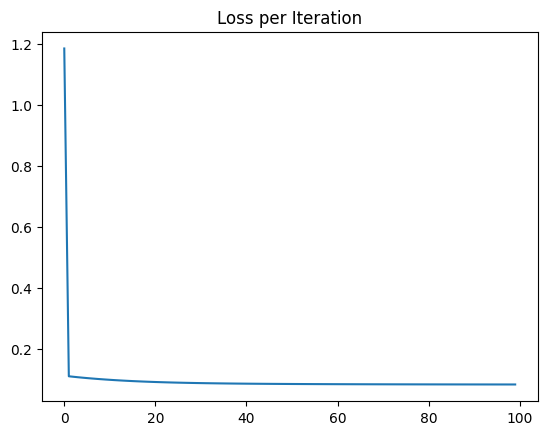

In [101]:
# Answer Here
def gradient_descent(X, y, w, lr=0.01):
    losses = []
    for epoch in range(100):
        y_hat = forward(X, w)
        loss = logit_loss(y_hat, y)
        losses.append(loss)
        w = w - lr * (X.T @ (y_hat - y))
    return w, losses

w_opt, losses = gradient_descent(X, y, w)
print(w_opt)

plt.plot(losses)
plt.title('Loss per Iteration')
plt.show()

## Question 8 - Decision Boundary

We can now visualise the parameters of our optimised model to see how well it has learned to separate the two classes we plotted before. The following function will allow you to draw the boundary:

$$
f(x) = - \frac{w_1x + b}{w_2}
$$

i) Plot the original points again

ii) Plot the decision boundary

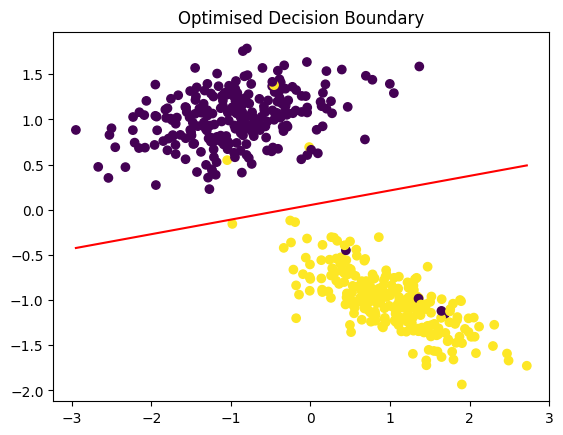

In [104]:
# Answer Here
bias = w_opt[0]
weights = w_opt[1:]

fig, ax = plt.subplots()
x_space = np.linspace(np.min(X[:, 1]), np.max(X[:, 1]), 100)
f_x = -(weights[0] * x_space + bias) / weights[1]

plt.scatter(X[:, 1], X[:, 2], marker='o', c=y)
plt.plot(x_space, f_x, color='red')
plt.title('Optimised Decision Boundary')
plt.show()

# Extension - Maths

## Log Odds and Cross Entropy

To explain how we got from log odds to cross entropy, we need to first look at `entropy` $H(p)$ from information theory. This is a measure of the disorder in a system.

$$
H(p) = - \sum_{i}p_i log(p_i)
$$

Another important concept to understand is `Kullback-Leibler Divergence` $KL(p, q)$ which is a measure of how similar probability distribution $p$ is to probability distribution $q$.

$$
KL(p, q) = - \sum_{i}p_i log(\frac{p_i}{q_i})
$$

`Note:` $KL(p, q) \neq KL(q, p)$

By expanding out the logarithm, we find entropy in the equation. By 

$$
KL(p, q) = - \sum_{i}p_i log(\frac{p_i}{q_i}) 
$$
$$
\implies - \sum_{i}p_ilog(p_i) - p_ilog(q_i)
$$
$$
\implies \sum_{i}p_ilog(\frac{1}{q_i}) - \sum_{i}p_i log(p_i)
$$

`Cross Entropy` is the summation of `entropy` and `KL-Divergence`:

$$
CE(p, q) = H(p) + KL(p, q) = \sum_{i}p_i log(\frac{1}{q_i}) = - \sum_{i}p_i log(q_i)
$$

For our output from sigmoid $\hat{y} = \sigma(z)$ and out actual value $y$, for a single data point, we achieve the following function:

$$
CE(\hat{y}, y) = -(y log(\hat{y} + (1 - y)log(1 - \hat{y})))
$$

By applying this function over the whole dataset, we get the loss function we defined earlier:

$$
J(\theta) = -\frac{1}{m}\sum_{i}y_i log(\hat{y_i}) + (1 - y_i)log(1 - \hat{y_i})
$$